# **America’s Top College Rankings (Forbes,2019)**


https://www.kaggle.com/chris95cam/forbes-americas-top-colleges-2019?select=ForbesAmericasTopColleges2019.csv

https://drive.google.com/file/d/1-zJIFo0aRvMWX9ygs8LownXnEkh5eh2X/view?usp=sharing (Direct link to CSV)


I will be using an open source dataset, compiled by Forbes, which analyzes the rankings of the top 650 colleges in the United States. This dataset provides a broad and accurate view of multiple data points that give a clear view of the quality of education provided by these colleges. Locations, rankings, grant funds used, student/alumni populations, and tuition costs are provided in this dataset. 
My goal is to use these rankings to provide insight to the overall value provided by institutions of the analyzed category (for each hypothesis). A specific focus on public versus private institutions will be maintained. Multiple correlations between data points will be examined to make these observations. The referenced value will be examined with the students and their family as the audience. Students and their families are the ‘clients’ of a college, and I would like to provide insights that can be referenced by the schools, of the referenced category, to attract those clients. This data is intended to be used to attract future students to the value provided by institutions of a certain category. This data is intended to be categorical and not institution specific. 


**Now we will import the needed libraries**

In [ ]:
from google.colab import drive #mounting drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Import pandas , scipy, and math

import pandas as pd
from scipy import stats
import math

In [ ]:

import seaborn as sns #importing seaborn for visualizations  
sns.set()

# suppress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Now we will read and test the mount of the CSV . We will also fill null values as well as begin some generic analysis.**  

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/ForbesAmericasTopColleges2019.csv')
df.head() # testing successful mount

,Rank,Name,City,State,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,Website
0,1.0,Harvard University,Cambridge,MA,Private,13844.0,31120.0,14327.0,49870.0,69600.0,146800.0,5.0,1460.0,1590.0,32.0,35.0,www.harvard.edu
1,2.0,Stanford University,Stanford,CA,Private,8402.0,17534.0,13261.0,50134.0,69109.0,145200.0,5.0,1390.0,1540.0,32.0,35.0,www.stanford.edu
2,3.0,Yale University,New Haven,CT,Private,6483.0,12974.0,18627.0,50897.0,71290.0,138300.0,7.0,1460.0,1580.0,32.0,35.0,www.yale.edu
3,4.0,Massachusetts Institute of Technology,Cambridge,MA,Private,4680.0,11466.0,20771.0,43248.0,67430.0,155200.0,7.0,1490.0,1570.0,33.0,35.0,web.mit.edu
4,5.0,Princeton University,Princeton,NJ,Private,5659.0,8273.0,9327.0,48088.0,66150.0,139400.0,6.0,1430.0,1570.0,31.0,35.0,www.princeton.edu


This dataset has 650 rows and 17 columns

In [ ]:
df.shape #

(650, 17)

Now we will check the dataframe for nulls . 

In [ ]:
df.info() #Checking for nulls 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rank                      650 non-null    float64
 1   Name                      650 non-null    object 
 2   City                      647 non-null    object 
 3   State                     650 non-null    object 
 4   Public/Private            650 non-null    object 
 5   Undergraduate Population  650 non-null    float64
 6   Student Population        650 non-null    float64
 7   Net Price                 648 non-null    float64
 8   Average Grant Aid         646 non-null    float64
 9   Total Annual Cost         650 non-null    float64
 10  Alumni Salary             635 non-null    float64
 11  Acceptance Rate           648 non-null    float64
 12  SAT Lower                 551 non-null    float64
 13  SAT Upper                 551 non-null    float64
 14  ACT Lower 

There are some significant nulls in the SAT and ACT columns, but we will not be using those in our analysis . Regardless, we will fill these nulls with an 'N/A'.

In [ ]:
df.fillna('N/A') # Filling with N/A , but the columns with significant numbers of nulls are not being used during analysis 

,Rank,Name,City,State,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,Website
0,1.0,Harvard University,Cambridge,MA,Private,13844.0,31120.0,14327,49870,69600.0,146800,5,1460,1590,32,35,www.harvard.edu
1,2.0,Stanford University,Stanford,CA,Private,8402.0,17534.0,13261,50134,69109.0,145200,5,1390,1540,32,35,www.stanford.edu
2,3.0,Yale University,New Haven,CT,Private,6483.0,12974.0,18627,50897,71290.0,138300,7,1460,1580,32,35,www.yale.edu
3,4.0,Massachusetts Institute of Technology,Cambridge,MA,Private,4680.0,11466.0,20771,43248,67430.0,155200,7,1490,1570,33,35,web.mit.edu
4,5.0,Princeton University,Princeton,NJ,Private,5659.0,8273.0,9327,48088,66150.0,139400,6,1430,1570,31,35,www.princeton.edu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,646.0,New Mexico State University,Las Cruces,NM,Public,13379.0,14432.0,8625,9582,34720.0,96700,64,910,1160,18,23,www.nmsu.edu
646,647.0,Indiana State University,Terre Haute,IN,Public,13626.0,13763.0,13012,9297,32938.0,85600,85,900,1110,17,23,www.indstate.edu
647,648.0,Emory &amp; Henry College,Emory,VA,Private,1094.0,1226.0,19340,27155,48100.0,70700,72,988,1170,19,25,www.ehc.edu
648,649.0,Wells College,Aurora,NY,Private,488.0,516.0,22828,30207,55180.0,N/A,80,N/A,N/A,N/A,N/A,www.wells.edu


# **I will be working to analyze four hypotheses during this presentation.** 

---

They are listed below:
1.	Do private institutions have an average lower Total Annual Cost than public institutions?


2.	Do public institutions rank higher on average than private institutions? 


3.	Do private institutions have a higher Acceptance Rate than public instituitions?

4.	Do public institutions have a higher Average Grant Aid than private institutions? 


# **Hypothesis 1**

**Null: Do private institutions have an average lower Total Annual Cost than public institutions?**

We will begin by creating a bucket DF (hyp_1) for our specific columns used during this analysis. 

In [ ]:
hyp_1 = df[['Rank', 'Name', 'Public/Private', 'Total Annual Cost']] # placing needed variables into bucket DF Ken Wood6:28 PM


In [ ]:
hyp_1.head()

,Rank,Name,Public/Private,Total Annual Cost
0,1.0,Harvard University,Private,69600.0
1,2.0,Stanford University,Private,69109.0
2,3.0,Yale University,Private,71290.0
3,4.0,Massachusetts Institute of Technology,Private,67430.0
4,5.0,Princeton University,Private,66150.0


There are 650 rows and 4 columns in this dataframe. 

In [ ]:
hyp_1.shape 

(650, 4)

Now we will split the hyp_1 dataframe by public and private institutions. Beginning with Public:

In [ ]:
public = hyp_1.iloc[(hyp_1['Public/Private'] == 'Public').values] # separating public institutions
public.head() # we can already see the top 11 institutions are private 

,Rank,Name,Public/Private,Total Annual Cost
12,13.0,"University of California, Berkeley",Public,65003.0
19,20.0,"University of Michigan, Ann Arbor",Public,62176.0
23,24.0,United States Naval Academy,Public,0.0
31,32.0,United States Military Academy,Public,0.0
32,33.0,University of Virginia,Public,62633.0


There are 250 rows and 4 columns in the public dataframe. 

In [ ]:
public.shape 

(250, 4)

And moving to private:

In [ ]:
private = hyp_1.iloc[(hyp_1['Public/Private'] == 'Private').values] # separating private institutions
private.head(11)

,Rank,Name,Public/Private,Total Annual Cost
0,1.0,Harvard University,Private,69600.0
1,2.0,Stanford University,Private,69109.0
2,3.0,Yale University,Private,71290.0
3,4.0,Massachusetts Institute of Technology,Private,67430.0
4,5.0,Princeton University,Private,66150.0
5,6.0,University of Pennsylvania,Private,71715.0
6,7.0,Brown University,Private,71050.0
7,8.0,California Institute of Technology,Private,68901.0
8,9.0,Duke University,Private,71764.0
9,10.0,Dartmouth College,Private,71827.0


There are 400 rows and 4 columns in the private dataframe. 

In [ ]:
private.shape 

(400, 4)

Now we will begin statistical analysis of the public and private dataframes beginning with private. This will determine the answer to our hypothesis. 

In [ ]:
private['Total Annual Cost'].describe() # starter statistics

count      400.00000
mean     57082.62750
std      10298.79213
min      12322.00000
25%      49930.00000
50%      57370.00000
75%      65957.50000
max      75735.00000
Name: Total Annual Cost, dtype: float64

The mean is our most important number above. It shows a $57,082.63 average Total Annual Cost. 

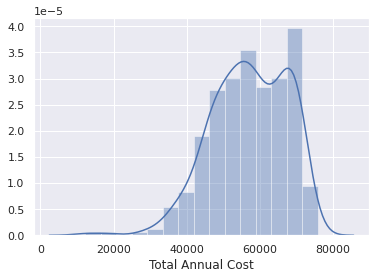

In [ ]:
ax = sns.distplot(private['Total Annual Cost']) #normal distribution confirmed

The Histogram above shows that we have a normal distribution in our values within the column of Total Annual Cost. 

Now we will analyze the public dataframe's statistics. 

In [ ]:
public['Total Annual Cost'].describe() # starter statistics , and technically we have already disproven our hypothesis . Time for some visuals. 

count      250.000000
mean     39526.252000
std       9763.818174
min          0.000000
25%      34524.500000
50%      38536.000000
75%      44171.000000
max      65003.000000
Name: Total Annual Cost, dtype: float64

Our mean is again the most important number here and we can see a $39,526.25 Total Annual Cost on average for public institutions. 

Below we will plot the points in a histogram. 

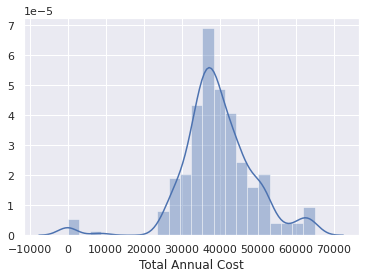

In [ ]:
ax = sns.distplot(public['Total Annual Cost']) #normal distribution confirmed

Our histogram shows some minor outliers at the 0 cost range. These are military institutions and I felt it was proper to keep their cost included in our calculations , because that is the accurate story of the data. 

Now we will run a simple T-test to determine the reliability of these dataframes and to confirm our results. 

In [ ]:
stats.ttest_ind(public['Total Annual Cost'], private['Total Annual Cost'])

Ttest_indResult(statistic=-21.567708486238956, pvalue=3.5433374270295964e-78)

As you can see our T-test P-value shows a strong negative result . We have some solid evidence to reject our null with this . 

Now we will calculate the confidence interval between the two dataframes. 

In [ ]:
# Calculate the sample size, mean and variance of each sample...
# We will need this information to calculate standard errors

sample_1_n = public.shape[0]
sample_2_n = private.shape[0]
sample_1_mean = public['Total Annual Cost'].mean()
sample_2_mean = private['Total Annual Cost'].mean()
sample_1_var = public['Total Annual Cost'].var()
sample_2_var = private['Total Annual Cost'].var()

In [ ]:
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between 15980.44362192622 and 19132.307378073783.


The results from our confidence interval show a very substantial difference in means and provides us the evidence to reject our null. 

*I would say that the 0 cost values for the Military institutions play a part in our findings , but they are technically public and that is their cost.*

**Private Total Annual Cost: $57,082.63**

**Public Total Annual Cost: $39,526.25**

**We can reject our hypothesis that private institutions have a lower average Total Annual Cost. Our P-value and confidence interval strongly support our conclusion to reject the null.** 

**From this result we can gather that those looking for a lower cost may want to gear their college search towards public institutions.** 

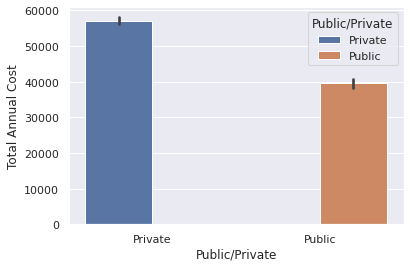

In [ ]:
ax = sns.barplot(x="Public/Private", y="Total Annual Cost", hue="Public/Private", data=df)

The bar-plot above is merely a visualisation of the means for both public and private institutions. I thought this would be a nice capstone for this hypothesis. 

# **Hypothesis 2**

**Null: Do public institutions rank higher on average than private institutions?**



Beginning with Private institutions we will start with some generic stats. The previous public and private dataframes from Hypothesis 1 will be used for ease since they contain the ranking. 

In [ ]:
private.head() # We will re-use these variables as they contain the ranking as well 

,Rank,Name,Public/Private,Total Annual Cost
0,1.0,Harvard University,Private,69600.0
1,2.0,Stanford University,Private,69109.0
2,3.0,Yale University,Private,71290.0
3,4.0,Massachusetts Institute of Technology,Private,67430.0
4,5.0,Princeton University,Private,66150.0


Below we will plot the points in a histogram to check the distribution. 

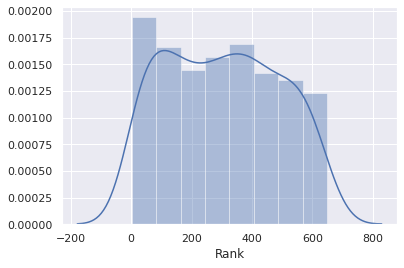

In [ ]:
ax = sns.distplot(private['Rank']) #normal distribution confirmed

Next we will run some statistics and our main focus will be the mean. The mean rank for private institutions is 303.5.

In [ ]:
private['Rank'].describe() # starter statistics

count    400.000000
mean     303.605000
std      187.472074
min        1.000000
25%      136.500000
50%      302.500000
75%      460.250000
max      650.000000
Name: Rank, dtype: float64

.

Now for the public institutions:

In [ ]:
public.head()

,Rank,Name,Public/Private,Total Annual Cost
12,13.0,"University of California, Berkeley",Public,65003.0
19,20.0,"University of Michigan, Ann Arbor",Public,62176.0
23,24.0,United States Naval Academy,Public,0.0
31,32.0,United States Military Academy,Public,0.0
32,33.0,University of Virginia,Public,62633.0


Again we will plot the points in a histogram to view the distributions. 

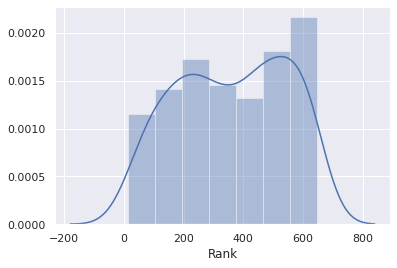

In [ ]:
ax = sns.distplot(public['Rank']) #normal distribution confirmed

Again we will measure statitistics with a main focus on the mean of the Rank column which is 360.5 . 

In [ ]:
public['Rank'].describe() # starter statistics , and technically we have already disproven our hypothesis . Time for some confirmation though. 

count    250.000000
mean     360.532000
std      183.272683
min       13.000000
25%      206.500000
50%      364.500000
75%      517.750000
max      647.000000
Name: Rank, dtype: float64

Now we will run a T-test to confirm the reliability of our data in the public and private dataframe. 

Our P-Value shows weak evidence against the null hypothesis. 

In [ ]:
stats.ttest_ind(private['Rank'], public['Rank'])

Ttest_indResult(statistic=-3.7988588113856046, pvalue=0.00015904441902993242)

Next we will use these results to calculate the confidence interval between the public and private dataframes. 

In [ ]:
# Calculate the sample size, mean and variance of each sample...
# We will need this information to calculate standard errors

sample_1_n = public.shape[0]
sample_2_n = private.shape[0]
sample_1_mean = public['Rank'].mean()
sample_2_mean = private['Rank'].mean()
sample_1_var = public['Rank'].var()
sample_2_var = private['Rank'].var()

In [ ]:
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between -86.14480565901007 and -27.709194340989846.


From this result we can see there is a notable difference in the mean Rank from our confidence interval test. 

**As we can see the Public institutions perform strongly despite their lack of positioning in the top 10 ranking.** 

Public Average Ranking : 360.5

Private Average Ranking: 303.6

**We can reject our hypothesis null that public institutions have an average ranking that is lower than private institutions. Our P-values and confidence interval results support this result.** 

**This result shows that students searching for a higher ranking institution should gear their college search towards private institutions.**



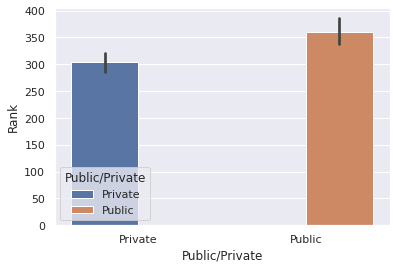

In [ ]:
ax = sns.barplot(x="Public/Private", y="Rank", hue="Public/Private", data=df)

The above bar-plot is merely to show a visualisation of the means of the Ranks between public and private institutions. 

# **Hypothesis 3**

**Null: Do private institutions have a higher Acceptance Rate than public institutions?**

We will begin with creating a bucket dataframe and then seperating these into a public and private dataframe for the individual designations. 

In [ ]:
hyp_3 = df[['Rank', 'Name', 'Public/Private', 'Acceptance Rate']] # placing needed variables into bucket DF


Our hyp_3 dataframe has 650 rows and 4 columns. 

In [ ]:
hyp_3.shape

(650, 4)

In [ ]:
hyp_3.head()

,Rank,Name,Public/Private,Acceptance Rate
0,1.0,Harvard University,Private,5.0
1,2.0,Stanford University,Private,5.0
2,3.0,Yale University,Private,7.0
3,4.0,Massachusetts Institute of Technology,Private,7.0
4,5.0,Princeton University,Private,6.0


**Below is an examination of the statistics of the entire dataframe including both Public and Private institutions and their Acceptance Rates**

In [ ]:
hyp_3['Acceptance Rate'].describe()

count    648.000000
mean      61.597222
std       22.024781
min        5.000000
25%       48.000000
50%       67.000000
75%       78.000000
max      100.000000
Name: Acceptance Rate, dtype: float64

We will now create our variable dataframes seperating public and private institutions. Starting with public:

In [ ]:
public = hyp_3.iloc[(hyp_1['Public/Private'] == 'Public').values] # separating public institutions

The public dataframe has 250 rows and 4 columns. 

In [ ]:
public.shape

(250, 4)

In [ ]:
public.head()

,Rank,Name,Public/Private,Acceptance Rate
12,13.0,"University of California, Berkeley",Public,17.0
19,20.0,"University of Michigan, Ann Arbor",Public,27.0
23,24.0,United States Naval Academy,Public,8.0
31,32.0,United States Military Academy,Public,10.0
32,33.0,University of Virginia,Public,27.0


Below we will plot the Acceptance Rates on a histogram to investigate their distribution. 

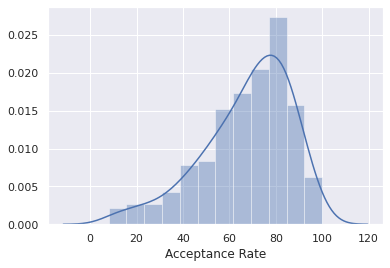

In [ ]:
ax = sns.distplot(public['Acceptance Rate']) #normal distribution confirmed

Now to create a private institution dataframe. 

In [ ]:
private = hyp_3.iloc[(hyp_1['Public/Private'] == 'Private').values] # separating private institutions

Our private dataframe has 400 rows and 4 columns. 

In [ ]:
private.shape

(400, 4)

In [ ]:
private.head()

,Rank,Name,Public/Private,Acceptance Rate
0,1.0,Harvard University,Private,5.0
1,2.0,Stanford University,Private,5.0
2,3.0,Yale University,Private,7.0
3,4.0,Massachusetts Institute of Technology,Private,7.0
4,5.0,Princeton University,Private,6.0


Again we will plot the Acceptance Rates on a histogram to investigate their distribution. It is notable that there is a slight skew toward the left compared to the public dataframe histogram. 

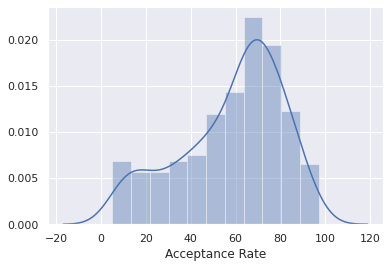

In [ ]:
ax = sns.distplot(private['Acceptance Rate']) #normal distribution confirmed

Now we will determine the average Acceptance Rate for Public Institutions. Our focus here is the mean which is 67.5.  

In [ ]:
public['Acceptance Rate'].describe()

count    248.000000
mean      67.467742
std       19.204603
min        8.000000
25%       57.000000
50%       72.000000
75%       82.000000
max      100.000000
Name: Acceptance Rate, dtype: float64

And last to determine the average Acceptance Rate for Private institutions. Our focus here is the mean which is 58.0. 

In [ ]:
private['Acceptance Rate'].describe()

count    400.000000
mean      57.957500
std       22.881972
min        5.000000
25%       43.000000
50%       64.000000
75%       74.000000
max       97.000000
Name: Acceptance Rate, dtype: float64

Now we will run a T-test to confirm the reliability of the data in the public and private dataframes. Our P-value result shows strong evidence to reject the null that private institutions have a higher acceptance rate. 

In [ ]:
stats.ttest_ind(public['Acceptance Rate'], private['Acceptance Rate'], nan_policy='omit')

Ttest_indResult(statistic=5.460214771009835, pvalue=6.789214461369456e-08)

Next we will use these results to calculate the confidence interval between the public and private dataframes.

In [ ]:
# Calculate the sample size, mean and variance of each sample...
# We will need this information to calculate standard errors

sample_1_n = public.shape[0]
sample_2_n = private.shape[0]
sample_1_mean = public['Acceptance Rate'].mean()
sample_2_mean = private['Acceptance Rate'].mean()
sample_1_var = public['Acceptance Rate'].var()
sample_2_var = private['Acceptance Rate'].var()

In [ ]:
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between -12.780699553164439 and -6.239784317803298.


The results of our confidence interval test provide verification of the accuracy of our findings regarding rejecting our null hypothesis. 

**As we can see the null is rejected that private institutions have a higher acceptance rate. We can see there is a statistically significant difference in the higher acceptance rate shown by public institutions.** 

Public Acceptance Rate : 67.5

Private Acceptance Rate: 58.0

**From these results we can gather that students look for a higher Acceptance Rate should gear their college search towards public institutions. It will provide for a lower barrier to entry for students with a worry about being accepted.** 

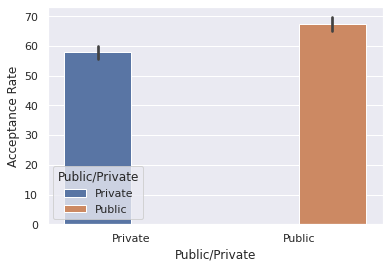

In [ ]:
ax = sns.barplot(x="Public/Private", y="Acceptance Rate", hue="Public/Private", data=df)

Above is a bar-plot visualizing the mean Acceptance Rate of both public and private institutions. 

# **Hypothesis 4**

**Null: Do public institutions have a higher Average Grant Aid than private institutions?**

We will begin by creating a bucket dataframe for the columns needing to be analyzed. We will then separate those into public and private dataframes for the respective category of public and private results. 

Below will be a general analysis of the entire combined dataframe:

In [ ]:
hyp_4 = df[['Rank', 'Name', 'Public/Private', 'Average Grant Aid']] # placing needed variables into bucket DF


This dataframe has 650 rows and 4 columns. 

In [ ]:
hyp_4.shape

(650, 4)

In [ ]:
hyp_4.head()

,Rank,Name,Public/Private,Average Grant Aid
0,1.0,Harvard University,Private,49870.0
1,2.0,Stanford University,Private,50134.0
2,3.0,Yale University,Private,50897.0
3,4.0,Massachusetts Institute of Technology,Private,43248.0
4,5.0,Princeton University,Private,48088.0


Below is a brief analysis of the entire dataframe including both public and private institutions. 

In [ ]:
hyp_4['Average Grant Aid'].describe()

count      646.000000
mean     20031.208978
std      11175.869976
min       2975.000000
25%       9288.250000
50%      19605.000000
75%      27474.500000
max      50897.000000
Name: Average Grant Aid, dtype: float64

Now we will seperate the private and public institutions into their own variable dataframes. Starting with Private:

In [ ]:
private = hyp_4.iloc[(hyp_4['Public/Private'] == 'Private').values] # separating private institutions

This private dataframe has 400 rows and 4 columns. 

In [ ]:
private.shape

(400, 4)

In [ ]:
private.head()

,Rank,Name,Public/Private,Average Grant Aid
0,1.0,Harvard University,Private,49870.0
1,2.0,Stanford University,Private,50134.0
2,3.0,Yale University,Private,50897.0
3,4.0,Massachusetts Institute of Technology,Private,43248.0
4,5.0,Princeton University,Private,48088.0


Below we will plot the data points for Average Grant Aid in a histogram to investigate their distribution. 

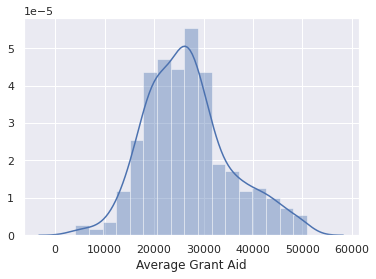

In [ ]:
ax = sns.distplot(private['Average Grant Aid']) #normal distribution confirmed

Now we will separate public institutions. 




In [ ]:
public = hyp_4.iloc[(hyp_4['Public/Private'] == 'Public').values] # separating private institutions

This dataframe contains 250 rows and 4 columns. 

In [ ]:
public.shape

(250, 4)

*Military academies do not take any Grant Aid and are replaced with NaN which effectively counts as 0 for the purposes of mean calculations. They are kept in the calculation of means as a row,  as it is technically the true data, and I do not feel comfortable adjusting it in that manner. They are omitted from the T-test as well as histograms and bar-plots.* 

In [ ]:
public.head()  

,Rank,Name,Public/Private,Average Grant Aid
12,13.0,"University of California, Berkeley",Public,18319.0
19,20.0,"University of Michigan, Ann Arbor",Public,18751.0
23,24.0,United States Naval Academy,Public,NaN
31,32.0,United States Military Academy,Public,NaN
32,33.0,University of Virginia,Public,21171.0


Below we will plot the datapoints of Average Grant Aid to investigate their distribution. 

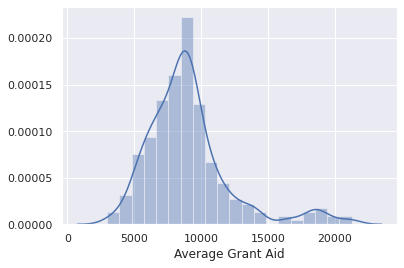

In [ ]:
ax = sns.distplot(public['Average Grant Aid']) #normal distribution confirmed

Now we will determine the averages of public and private Grant Aid for the entire group.

Our focus will be the mean which is $26,796.23 for private institutions. 
Beginning with private:

In [ ]:
private['Average Grant Aid'].describe()

count      400.000000
mean     26796.227500
std       8667.211173
min       4070.000000
25%      20675.750000
50%      26152.000000
75%      31023.500000
max      50897.000000
Name: Average Grant Aid, dtype: float64

And proceeding on to public where the mean is $9,031.18 . 

In [ ]:
public['Average Grant Aid'].describe()

count      246.000000
mean      9031.178862
std       3204.010548
min       2975.000000
25%       7057.750000
50%       8611.000000
75%       9920.500000
max      21249.000000
Name: Average Grant Aid, dtype: float64

Now we will run a T-test to determine the reliability of our results above in the public and private dataframes. 

(Military institutions are omitted from this calculation)

As we can see from our negative P-value we have strong evidence to reject the null hypothesis. 


In [ ]:
stats.ttest_ind(public['Average Grant Aid'], private['Average Grant Aid'], nan_policy='omit')

Ttest_indResult(statistic=-30.8693763081762, pvalue=4.103942730865631e-129)

Now we will use these results to calculate the confidence interval between the public and private dataframes.

In [ ]:
# Calculate the sample size, mean and variance of each sample...
# We will need this information to calculate standard errors

sample_1_n = public.shape[0]
sample_2_n = private.shape[0]
sample_1_mean = public['Average Grant Aid'].mean()
sample_2_mean = private['Average Grant Aid'].mean()
sample_1_var = public['Average Grant Aid'].var()
sample_2_var = private['Average Grant Aid'].var()

In [ ]:
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between 16827.389660841058 and 18702.707615581705.


From this confidence interval result we can determine that there is a strong basis to reject the null hypothesis. 

**As we can see from the above analysis, there is a statistically significant difference in the Average Grant Aid of public versus private institutions. We can reject our null that public institutions have a higher Average Grant Aid than private.** 

Public: $9,031.18

Private: $26,796.23

**Prospective students can use these findings in many ways , and it is a helpful statistic for them to have. Students may factor this into their financial calculations when determining which colleges to apply to.** 


Below is a bar-plot visualizing the mean Average Grant Aid of both public and private institutions. 

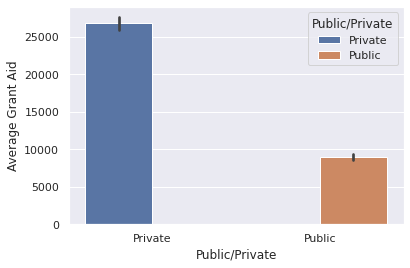

In [ ]:
ax = sns.barplot(x="Public/Private", y="Average Grant Aid", hue="Public/Private", data=df)

# **Conclusions**

**In this section we will make observations regarding the results of our individual hypotheses. These observations will be a synopsis of ways that the end user can use the results we found.** 

These results should prove to be quite valuable for our end user. To refresh, our end user is a student actively searching for a college to attend. These students will have a plethora of questions going into the process of choosing an institution, and I hope these results provide some insight to the analyzed metrics. 

Below we will provide a brief synopsis of each Hypothesis:

**Hypothesis 1**

For hypothesis 1 we can determine which category of institution would be best in terms of Total Annual Cost. This shows that the end user who is looking for a cheaper college cost should be gearing their search toward public institutions. This is notable, as many students are looking to lower their costs in terms of loans. I would go as far as to say this hypothesis will be seen as the most important factor in most students' choice of institution. 

**Hypothesis 2**

For hypothesis 2 we can determine that the end user who is looking for a higher ranking college overall should be looking towards a private institution. Many students like to be a part of a prestigious institution , and this hypothesis will provide guidance for these students. It is an important factor that encompasses every metric shown in the dataset. Students could use these results as a baseline before investigating the other hypotheses. 

**Hypothesis 3**

For hypothesis 3 we investigated average Acceptance Rates. The public institutions were shown to have an advantage when it came to this metric. Many students with lower grades and/or test scores would likely find this analysis useful when choosing an institution. This can provide ease of access when applying to an institution and give them a higher level of confidence when they do apply. Conversely, this metric shows that students looking for a prestigious institution could gear their search towards private institutions. 

**Hypothesis 4**

For Hypothesis 4 we investigated Average Grant Aid per category. The end user may find this metric less important, but it is important information for them to have. Oftentimes grant aid is established based upon a student's individual financial status, but it is important to know how much is used by the average student. This analysis shows that a student looking to rely heavily upon grant aid may want to focus their search upon private institutions. Many students can benefit from grant aid as it is not required to be paid back at the end of their tenure. 










I hope that this analysis can provide a bit of clarity when it comes to public versus private institutions. Students deserve the most accurate information available , and these results provide them with verifiable statistics to base their decisions upon. Choosing a college can be a daunting task that I hope is made easier by these results. 

Thank You 

Benjamin Stevens